In [1]:
from SimPEG.EM.Static import DC
from SimPEG import Mesh, EM
%pylab inline

/Users/sgkang/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Populating the interactive namespace from numpy and matplotlib


In [2]:
hx = np.ones(100)*100
hy = np.ones(50)*100
mesh = Mesh.TensorMesh([hx, hy], x0="CN")

In [3]:
mesh.vectorCCx

array([-4950., -4850., -4750., -4650., -4550., -4450., -4350., -4250.,
       -4150., -4050., -3950., -3850., -3750., -3650., -3550., -3450.,
       -3350., -3250., -3150., -3050., -2950., -2850., -2750., -2650.,
       -2550., -2450., -2350., -2250., -2150., -2050., -1950., -1850.,
       -1750., -1650., -1550., -1450., -1350., -1250., -1150., -1050.,
        -950.,  -850.,  -750.,  -650.,  -550.,  -450.,  -350.,  -250.,
        -150.,   -50.,    50.,   150.,   250.,   350.,   450.,   550.,
         650.,   750.,   850.,   950.,  1050.,  1150.,  1250.,  1350.,
        1450.,  1550.,  1650.,  1750.,  1850.,  1950.,  2050.,  2150.,
        2250.,  2350.,  2450.,  2550.,  2650.,  2750.,  2850.,  2950.,
        3050.,  3150.,  3250.,  3350.,  3450.,  3550.,  3650.,  3750.,
        3850.,  3950.,  4050.,  4150.,  4250.,  4350.,  4450.,  4550.,
        4650.,  4750.,  4850.,  4950.])

In [65]:
locM = mesh.gridCC
locA = np.r_[-1050, 0]
locB = np.r_[1050, -0]
rx = DC.Rx.Dipole(locM, locM)
src = DC.Src.Dipole([rx], locA, locB)
# src = DC.Src.Pole([rx], locA)
prob = DC.Problem3D_CC(mesh)
survey = DC.Survey([src])
survey.pair(prob)
sigma0 = np.ones(mesh.nC)*1e-2
sigma1 = np.ones(mesh.nC)*1e-2
sigma1[mesh.gridCC[:,1]<-2000] = 1.
sigma2 = np.ones(mesh.nC)*1e-2
sigma2[mesh.gridCC[:,1]<-2000] = 1e-4
sigma3 = np.ones(mesh.nC)*1e-2
sigma3[np.logical_and(mesh.gridCC[:,0]>-500, mesh.gridCC[:,0]<500)] = 1e-4
f0 = prob.fields(sigma0)
f1 = prob.fields(sigma1)
f2 = prob.fields(sigma2)
f3 = prob.fields(sigma3)

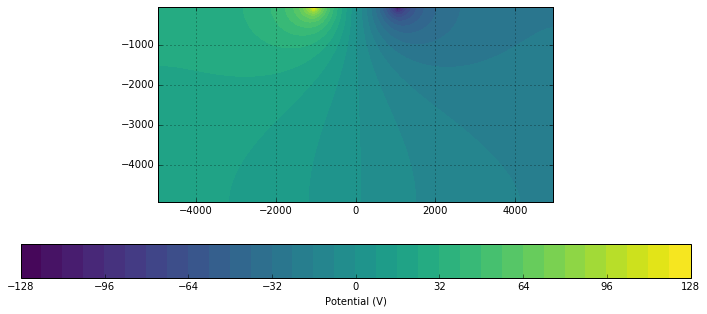

In [66]:
fig = plt.figure(figsize = (12, 5))
ax = plt.subplot(111)
dat = EM.Static.Utils.plot2Ddata(mesh.gridCC, f0[src, 'phi'], ax=ax, ncontour=31, contourOpts={"cmap":"viridis"})
ax.grid(True)
cb = plt.colorbar(dat[1], orientation="horizontal")
cb.set_label("Potential (V)")
plt.gca().set_aspect('equal', adjustable='box')

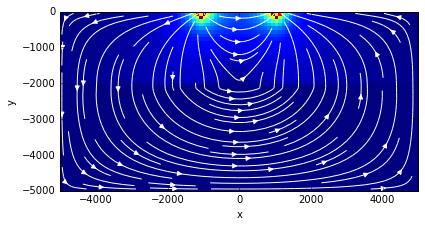

In [41]:
mesh.plotImage(prob.Grad*f1[src, 'phi'], vType='F', view="vec", streamOpts={"color":"w"}, pcolorOpts={"cmap":"jet"})
plt.gca().set_aspect('equal', adjustable='box')
plt.tight_layout()

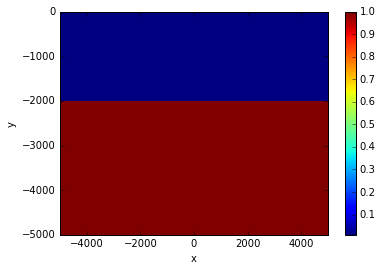

In [42]:
dat = mesh.plotImage(sigma1)
plt.colorbar(dat[0])

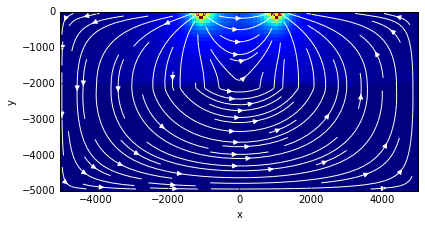

In [43]:
mesh.plotImage(f1[src, 'e'], vType='F', view="vec", streamOpts={"color":"w"})
plt.gca().set_aspect('equal', adjustable='box')
plt.tight_layout()

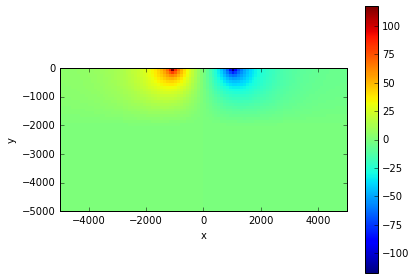

In [60]:
dat = mesh.plotImage(f1[src, 'phi'])
plt.gca().set_aspect('equal', adjustable='box')
plt.tight_layout()
plt.colorbar(dat[0])

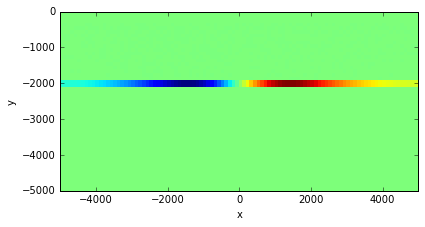

In [45]:
charg = f1[src, 'charge']
charg[mesh.gridCC[:,1]>-300] = 0.
mesh.plotImage(charg)
plt.gca().set_aspect('equal', adjustable='box')
plt.tight_layout()

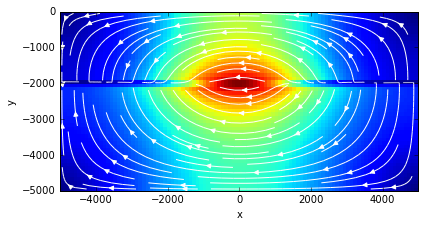

In [46]:
mesh.plotImage(f1[src, 'e']-f0[src, 'e'], vType='F', view="vec", streamOpts={"color":"w"})
plt.gca().set_aspect('equal', adjustable='box')
plt.tight_layout()

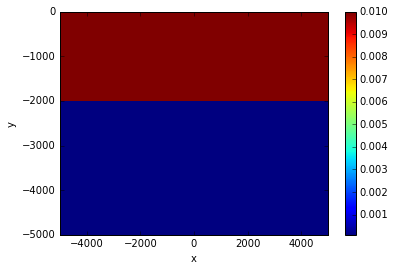

In [47]:
dat = mesh.plotImage(sigma2)
plt.colorbar(dat[0])

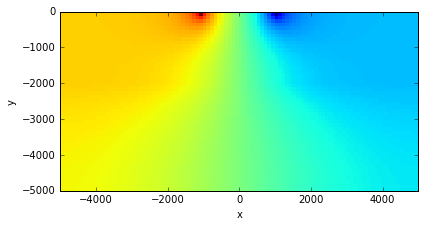

In [48]:
mesh.plotImage(f2[src, 'phi'], pcolorOpts={"cmap":"jet"})
plt.gca().set_aspect('equal', adjustable='box')
plt.tight_layout()

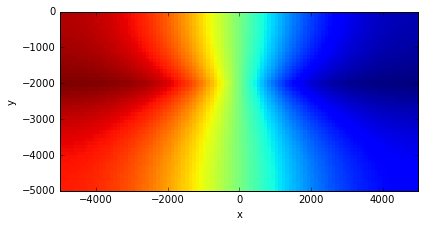

In [49]:
mesh.plotImage(f2[src, 'phi']-f0[src,'phi'], pcolorOpts={"cmap":"jet"})
plt.gca().set_aspect('equal', adjustable='box')
plt.tight_layout()

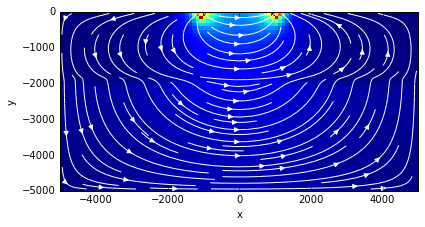

In [50]:
mesh.plotImage(f2[src, 'e'], vType='F', view="vec", streamOpts={"color":"w"})
plt.gca().set_aspect('equal', adjustable='box')
plt.tight_layout()

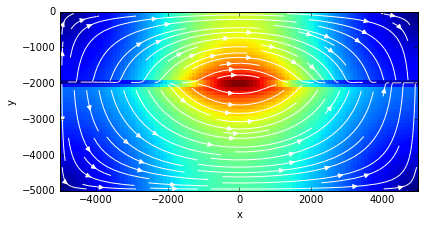

In [51]:
mesh.plotImage(f2[src, 'e']-f0[src, 'e'], vType='F', view="vec", streamOpts={"color":"w"})
plt.gca().set_aspect('equal', adjustable='box')
plt.tight_layout()

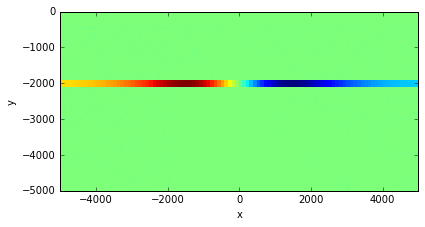

In [33]:
charg = f2[src, 'charge']
charg[mesh.gridCC[:,1]>-300] = 0.
mesh.plotImage(charg)
plt.gca().set_aspect('equal', adjustable='box')
plt.tight_layout()

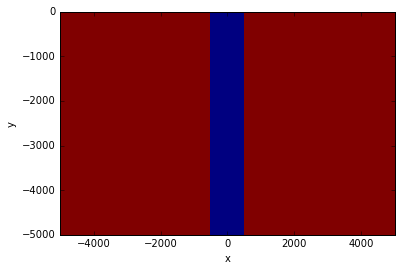

In [34]:
dat = mesh.plotImage(sigma3)
# plt.colorbar(dat[0])

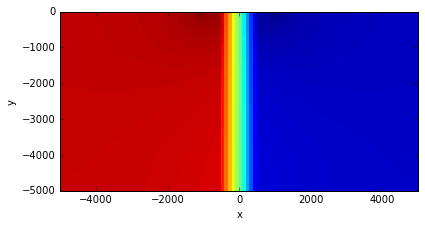

In [35]:
mesh.plotImage(f3[src, 'phi'])
plt.gca().set_aspect('equal', adjustable='box')
plt.tight_layout()

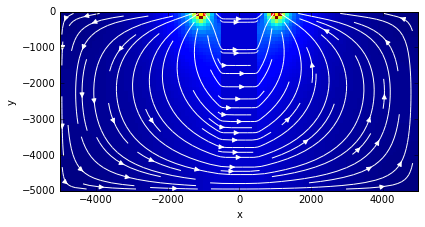

In [36]:
mesh.plotImage(f3[src, 'j'], vType='F', view="vec", streamOpts={"color":"w"})
plt.gca().set_aspect('equal', adjustable='box')
plt.tight_layout()

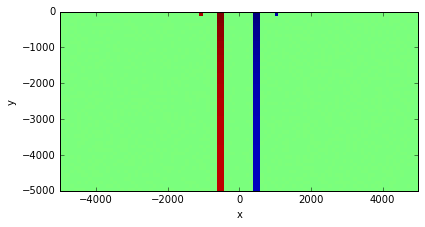

In [37]:
mesh.plotImage(f3[src, 'charge'])
plt.gca().set_aspect('equal', adjustable='box')
plt.tight_layout()